In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from packaging import version

# Load the TensorBoard notebook extension.
%load_ext tensorboard
import tensorboard

import tensorflow as tf
from tensorflow import keras


In [2]:
#Checking tf version so that I can easily deal with different version issue
tf.__version__

#Setting seed
tf.random.set_seed(12345)
tf.compat.v1.random.set_random_seed(12345)

In [3]:
# Loading MNIST
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [4]:
# Splitting the dataset into training testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0 
X_train, X_test = np.expand_dims(X_train, axis=-1), np.expand_dims(X_test, axis=-1)

print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


In [5]:
# Data preprocessing,
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



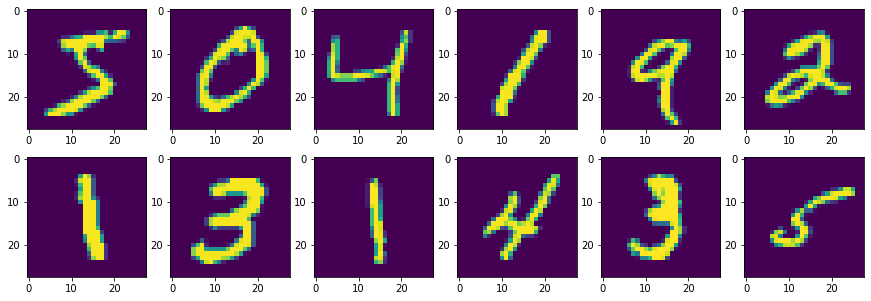

In [6]:
# Looking at samples from the data
from matplotlib.colors import Colormap
fig, axes = plt.subplots(nrows=2, ncols=6,figsize=(15,5))
ax = axes.ravel()
for i in range(12):
	ax[i].imshow(X_train[i].reshape(28,28))

plt.show()

# 1. Now I will build a regular CNN where the number of filters in each layer increases as the depth of the network grows i.e., the Lth layer will have more filters than the (L-1)th layer

In [7]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

#Building model
cnn_model1 = tf.keras.models.Sequential()
#Here, number of filters has been increased from 10 to 100
cnn_model1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_model1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_model1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_model1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model1.add(tf.keras.layers.Flatten())
cnn_model1.add(tf.keras.layers.Dense(256))
cnn_model1.add(tf.keras.layers.Activation('relu'))
cnn_model1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
cnn_model1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem

cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model1.build(input_shape=(1,28,28,1))
accuracy= cnn_model1.fit(X_train, y_train, batch_size=512, epochs=10)
cnn_model1.summary()

Epoch 1/10
118/118 [==============================] - 14s 22ms/step - loss: 1.0580 - accuracy: 0.6279
Epoch 2/10
118/118 [==============================] - 2s 20ms/step - loss: 0.2479 - accuracy: 0.9235
Epoch 3/10
118/118 [==============================] - 2s 20ms/step - loss: 0.1170 - accuracy: 0.9641
Epoch 4/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0863 - accuracy: 0.9737
Epoch 5/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0649 - accuracy: 0.9794
Epoch 6/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0527 - accuracy: 0.9830
Epoch 7/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0467 - accuracy: 0.9853
Epoch 8/10
118/118 [==============================] - 2s 21ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 9/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0367 - accuracy: 0.9879
Epoch 10/10
118/118 [==============================] - 2s 20ms/step - loss: 0.0320 - accur

In [8]:
# Evaluating the model
score = cnn_model1.evaluate(X_test, y_test)
print('Test loss for model1:', score[0])
print('Test accuracy for model1:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0616 - accuracy: 0.9799
Test loss for model1: 0.061642736196517944
Test accuracy for model1: 0.9799000024795532


In [9]:
#Trying 4 different learning rates
learningRate=[0.005, 0.01, 0.05, 0.1]
acc=np.zeros(4)
for i in range(len(learningRate)):

  cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model1.build(input_shape=(1,28,28,1))
  accuracy= cnn_model1.fit(X_train, y_train, batch_size=128, epochs=5)
  acc[i]=accuracy.history['accuracy'][4]
  cnn_model1.summary()

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.0620 - accuracy: 0.9814
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0489 - accuracy: 0.9851
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0413 - accuracy: 0.9880
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0333 - accuracy: 0.9904
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0288 - accuracy: 0.9915
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 20)        1820      
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 30)        5430      
                       

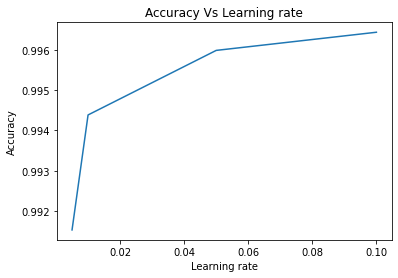

In [10]:
#Plotting accuracy vs learning rates
plt.plot(np.array(learningRate).reshape(4,1), np.array(acc).reshape(4,1))
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.title('Accuracy Vs Learning rate')
plt.show()

#Therefore, 0.1 worked best as learning rate

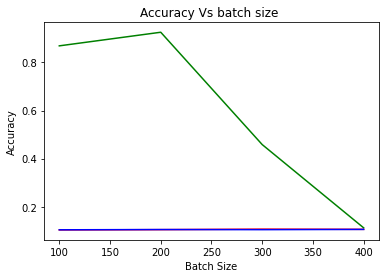

In [11]:
#Now, with 0.1 learning rate, I will try different combinations of batch size and optimizers
batch=[100, 200, 300, 400]
acc1=np.zeros(4)
acc2=np.zeros(4)
acc3=np.zeros(4)
for k in range(3):
  for i in range(len(batch)):    

        if k==0:
          opt_lr = tf.keras.optimizers.Adam(learning_rate=0.1)
          #Building model
          cnn_model1 = tf.keras.models.Sequential()
          #Here, number of filters has been increased from 10 to 100
          cnn_model1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_model1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_model1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_model1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))

          cnn_model1.add(tf.keras.layers.Flatten())
          cnn_model1.add(tf.keras.layers.Dense(256))
          cnn_model1.add(tf.keras.layers.Activation('relu'))
          cnn_model1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
          cnn_model1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem
          cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model1.build(input_shape=(1,28,28,1))  
          #model.summary() 
          accuracy1= cnn_model1.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc1[i]=accuracy1.history['accuracy'][4]
        
        elif k==1:
          opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)
          cnn_model1 = tf.keras.models.Sequential()
          #Here, number of filters has been increased from 10 to 100
          cnn_model1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_model1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_model1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_model1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))

          cnn_model1.add(tf.keras.layers.Flatten())
          cnn_model1.add(tf.keras.layers.Dense(256))
          cnn_model1.add(tf.keras.layers.Activation('relu'))
          cnn_model1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
          cnn_model1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem
          cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model1.build(input_shape=(1,28,28,1))  
          #model.summary() 
          accuracy2= cnn_model1.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc2[i]=accuracy2.history['accuracy'][4]

        
        elif k==2:
          opt_lr = tf.keras.optimizers.RMSprop(learning_rate=0.1)
          cnn_model1 = tf.keras.models.Sequential()
          #Here, number of filters has been increased from 10 to 100
          cnn_model1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_model1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_model1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
          cnn_model1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
          cnn_model1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))

          cnn_model1.add(tf.keras.layers.Flatten())
          cnn_model1.add(tf.keras.layers.Dense(256))
          cnn_model1.add(tf.keras.layers.Activation('relu'))
          cnn_model1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
          cnn_model1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem
          cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model1.build(input_shape=(1,28,28,1))  
          #model.summary() 
          accuracy3= cnn_model1.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc3[i]=accuracy3.history['accuracy'][4]

plt.plot(np.array(batch).reshape(4,1), np.array(acc1).reshape(4,1), color = 'red', label='Adam')
plt.plot(np.array(batch).reshape(4,1), np.array(acc2).reshape(4,1), color = 'green', label='SGD')
plt.plot(np.array(batch).reshape(4,1), np.array(acc3).reshape(4,1), color = 'blue', label='RMSProp')
plt.ylabel('Accuracy')
plt.xlabel('Batch Size')
plt.title('Accuracy Vs batch size ')
plt.show()

#It can be concluded that SGD worked best for model1. Batch size =200 has best impact on accuracy when optimizer is SGD and learning rate=0.1. 

In [12]:
#Final model 1 with atch size =200, optimizer = SGD and learning rate=0.1. 

logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)
#Building model
cnn_model1 = tf.keras.models.Sequential()
#Here, number of filters has been increased from 10 to 100
cnn_model1.add(tf.keras.layers.Conv2D(10, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(20, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(30, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_model1.add(tf.keras.layers.Conv2D(40, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(50, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(60, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_model1.add(tf.keras.layers.Conv2D(70, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(80, (3, 3), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
cnn_model1.add(tf.keras.layers.Conv2D(90, (3, 3), strides=(2, 2), padding='same', activation='relu'))
cnn_model1.add(tf.keras.layers.Conv2D(100, (3, 3), strides=(2, 2), padding='same', activation='relu'))

cnn_model1.add(tf.keras.layers.Flatten())
cnn_model1.add(tf.keras.layers.Dense(256))
cnn_model1.add(tf.keras.layers.Activation('relu'))
cnn_model1.add(tf.keras.layers.Dense(10))         #10 neurons to classify 10 different classes
cnn_model1.add(tf.keras.layers.Activation('softmax'))  #Since multiclass problem

cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
cnn_model1.build(input_shape=(1,28,28,1))
accuracy= cnn_model1.fit(X_train, y_train, batch_size=200, epochs=10)  #Since batch size=200 worked best
cnn_model1.summary()

Epoch 1/10
300/300 [==============================] - 4s 10ms/step - loss: 2.3015 - accuracy: 0.1118
Epoch 2/10
300/300 [==============================] - 3s 10ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 3/10
300/300 [==============================] - 3s 10ms/step - loss: 2.3008 - accuracy: 0.1124
Epoch 4/10
300/300 [==============================] - 3s 10ms/step - loss: 2.2582 - accuracy: 0.1532
Epoch 5/10
300/300 [==============================] - 3s 10ms/step - loss: 1.1242 - accuracy: 0.6050
Epoch 6/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2284 - accuracy: 0.9332
Epoch 7/10
300/300 [==============================] - 3s 10ms/step - loss: 0.1152 - accuracy: 0.9659
Epoch 8/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0829 - accuracy: 0.9752
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0696 - accuracy: 0.9793
Epoch 10/10
300/300 [==============================] - 3s 10ms/step - loss: 0.0524 - accura

In [15]:
# Evaluating the final model
score = cnn_model1.evaluate(X_test, y_test)
print('Test loss for model1:', score[0])
print('Test accuracy for model1:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0630 - accuracy: 0.9812
Test loss for model1: 0.06300977617502213
Test accuracy for model1: 0.9811999797821045


#So test accuracy has been increased from 0.97 to 0.9812

#2. Now I will build an inverted CNN where the number of filters in each layer decreases as the depth of the network grows i.e., the Lth layer will have less filters than the (L-1)th layer.

In [13]:
#Building model
cnn_model2 = tf.keras.models.Sequential()
#Here, number of filters has been decreased from 100 to 10
cnn_model2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model2.add(tf.keras.layers.Flatten())
cnn_model2.add(tf.keras.layers.Dense(256))
cnn_model2.add(tf.keras.layers.Activation('relu'))
cnn_model2.add(tf.keras.layers.Dense(10))        #10 neurons to classify 10 different classes
cnn_model2.add(tf.keras.layers.Activation('softmax'))   #Multiclass problem

cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model2.build(input_shape=(1,28,28,1))
cnn_model2.summary()

accuracy= cnn_model2.fit(X_train, y_train, batch_size=512, epochs=5)   #epoch reduced to 5 to save RAM space

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (1, 28, 28, 100)          1000      
                                                                 
 conv2d_141 (Conv2D)         (1, 28, 28, 90)           81090     
                                                                 
 conv2d_142 (Conv2D)         (1, 28, 28, 80)           64880     
                                                                 
 max_pooling2d_42 (MaxPoolin  (1, 14, 14, 80)          0         
 g2D)                                                            
                                                                 
 conv2d_143 (Conv2D)         (1, 14, 14, 70)           50470     
                                                                 
 conv2d_144 (Conv2D)         (1, 14, 14, 60)           37860     
                                                     

In [14]:
# Evaluating the model
score = cnn_model2.evaluate(X_test, y_test)
print('Test loss for model2:', score[0])
print('Test accuracy for model2:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0283 - accuracy: 0.9910
Test loss for model2: 0.028309408575296402
Test accuracy for model2: 0.9909999966621399


#Now, I will try different values for different hyperparametrs

Epoch 1/5
469/469 [==============================] - 17s 33ms/step - loss: 0.0601 - accuracy: 0.9819
Epoch 2/5
469/469 [==============================] - 16s 34ms/step - loss: 0.0385 - accuracy: 0.9886
Epoch 3/5
469/469 [==============================] - 15s 33ms/step - loss: 0.0344 - accuracy: 0.9894
Epoch 4/5
469/469 [==============================] - 15s 33ms/step - loss: 0.0270 - accuracy: 0.9919
Epoch 5/5
469/469 [==============================] - 16s 33ms/step - loss: 0.0243 - accuracy: 0.9930
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_140 (Conv2D)         (None, 28, 28, 100)       1000      
                                                                 
 conv2d_141 (Conv2D)         (None, 28, 28, 90)        81090     
                                                                 
 conv2d_142 (Conv2D)         (None, 28, 28, 80)        64880     
          

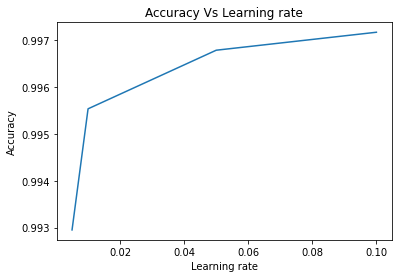

In [16]:
#4 different learning rate will be tested at first
learningRate=[0.005, 0.01, 0.05, 0.1]
acc=np.zeros(4)
for i in range(len(learningRate)):
  cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model2.build(input_shape=(1,28,28,1))
  accuracy= cnn_model2.fit(X_train, y_train, batch_size=128, epochs=5)
  acc[i]=accuracy.history['accuracy'][4]
  cnn_model2.summary()

plt.plot(np.array(learningRate).reshape(4,1), np.array(acc).reshape(4,1))
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.title('Accuracy Vs Learning rate')
plt.show()

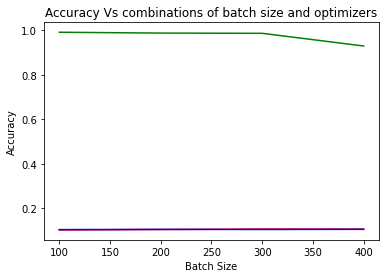

In [18]:
#Now, with 0.1 learning rate, I will try different combinations of batch size and optimizers
batch=[100, 200, 300, 400]
acc1=np.zeros(4)
acc2=np.zeros(4)
acc3=np.zeros(4)
for k in range(3):
  for i in range(len(batch)):    

        if k==0:
          opt_lr = tf.keras.optimizers.Adam(learning_rate=0.1)
          #Building model
          cnn_model2 = tf.keras.models.Sequential()
          #Here, number of filters has been decreased from 100 to 10
          cnn_model2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_model2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_model2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_model2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.Flatten())
          cnn_model2.add(tf.keras.layers.Dense(256))
          cnn_model2.add(tf.keras.layers.Activation('relu'))
          cnn_model2.add(tf.keras.layers.Dense(10))        #10 neurons to classify 10 different classes
          cnn_model2.add(tf.keras.layers.Activation('softmax'))   #Multiclass problem
          cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model2.build(input_shape=(1,28,28,1))  
          #model.summary() 
          accuracy1= cnn_model2.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc1[i]=accuracy1.history['accuracy'][4]
        
        elif k==1:
          opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)
          cnn_model2 = tf.keras.models.Sequential()
          #Here, number of filters has been decreased from 100 to 10
          cnn_model2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_model2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_model2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_model2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.Flatten())
          cnn_model2.add(tf.keras.layers.Dense(256))
          cnn_model2.add(tf.keras.layers.Activation('relu'))
          cnn_model2.add(tf.keras.layers.Dense(10))        #10 neurons to classify 10 different classes
          cnn_model2.add(tf.keras.layers.Activation('softmax'))   #Multiclass problem
          cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model2.build(input_shape=(1,28,28,1))  
          #model.summary() 
          accuracy2= cnn_model2.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc2[i]=accuracy2.history['accuracy'][4]

        
        elif k==2:
          opt_lr = tf.keras.optimizers.RMSprop(learning_rate=0.1)
          cnn_model2 = tf.keras.models.Sequential()
          #Here, number of filters has been decreased from 100 to 10
          cnn_model2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_model2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_model2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

          cnn_model2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
          cnn_model2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))

          cnn_model2.add(tf.keras.layers.Flatten())
          cnn_model2.add(tf.keras.layers.Dense(256))
          cnn_model2.add(tf.keras.layers.Activation('relu'))
          cnn_model2.add(tf.keras.layers.Dense(10))        #10 neurons to classify 10 different classes
          cnn_model2.add(tf.keras.layers.Activation('softmax'))   #Multiclass problem
          cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model2.build(input_shape=(1,28,28,1))  
          #model.summary() 
          accuracy3= cnn_model2.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc3[i]=accuracy3.history['accuracy'][4]


plt.plot(np.array(batch).reshape(4,1), np.array(acc1).reshape(4,1), color = 'red', label='Adam')
plt.plot(np.array(batch).reshape(4,1), np.array(acc2).reshape(4,1), color = 'green', label='SGD')
plt.plot(np.array(batch).reshape(4,1), np.array(acc3).reshape(4,1), color = 'blue', label='RMSProp')
plt.ylabel('Accuracy')
plt.xlabel('Batch Size')
plt.title('Accuracy Vs combinations of batch size and optimizers')
plt.show()

#It can be concluded that SGD worked best for model2. Batch size between 100 and 300 has almost no impact on accuracy when optimizer is SGD and learning rate=0.1. 

In [19]:
#Final model 2
opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)
#Building model
cnn_model2 = tf.keras.models.Sequential()
#Here, number of filters has been decreased from 100 to 10
cnn_model2.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model2.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model2.add(tf.keras.layers.Conv2D(40, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(30, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model2.add(tf.keras.layers.Conv2D(20, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model2.add(tf.keras.layers.Conv2D(10, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model2.add(tf.keras.layers.Flatten())
cnn_model2.add(tf.keras.layers.Dense(256))
cnn_model2.add(tf.keras.layers.Activation('relu'))
cnn_model2.add(tf.keras.layers.Dense(10))        #10 neurons to classify 10 different classes
cnn_model2.add(tf.keras.layers.Activation('softmax'))   #Multiclass problem

cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
cnn_model2.build(input_shape=(1,28,28,1))
cnn_model2.summary()

accuracy= cnn_model2.fit(X_train, y_train, batch_size=100, epochs=5) #Best batch size has been put  #epoch reduced to 5 to save RAM space

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_270 (Conv2D)         (1, 28, 28, 100)          1000      
                                                                 
 conv2d_271 (Conv2D)         (1, 28, 28, 90)           81090     
                                                                 
 conv2d_272 (Conv2D)         (1, 28, 28, 80)           64880     
                                                                 
 max_pooling2d_81 (MaxPoolin  (1, 14, 14, 80)          0         
 g2D)                                                            
                                                                 
 conv2d_273 (Conv2D)         (1, 14, 14, 70)           50470     
                                                                 
 conv2d_274 (Conv2D)         (1, 14, 14, 60)           37860     
                                                     

In [20]:
# Evaluating the final model
score = cnn_model2.evaluate(X_test, y_test)
print('Test loss for model1:', score[0])
print('Test accuracy for model1:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0263 - accuracy: 0.9916
Test loss for model1: 0.0262789037078619
Test accuracy for model1: 0.991599977016449


#Test accuracy is now 0.9916. This is the best accuracy I got till now

#3. Now I will build an hour-glass shaped CNN where the number of filters will increase till the Lth layer and reduce afterwards.

In [21]:
#Building model
cnn_model3 = tf.keras.models.Sequential()
#Here, number of filters has been increased from 50 to 100 and then decreased from 100 to 50
cnn_model3.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model3.add(tf.keras.layers.Flatten())
cnn_model3.add(tf.keras.layers.Dense(10))                        #10 neurons to classify 10 different classes
cnn_model3.add(tf.keras.layers.Activation('softmax'))

cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model3.build(input_shape=(1,28,28,1))
cnn_model3.summary()

accuracy= cnn_model3.fit(X_train, y_train, batch_size=512, epochs=5)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_280 (Conv2D)         (1, 28, 28, 50)           500       
                                                                 
 conv2d_281 (Conv2D)         (1, 28, 28, 60)           27060     
                                                                 
 conv2d_282 (Conv2D)         (1, 28, 28, 70)           37870     
                                                                 
 max_pooling2d_84 (MaxPoolin  (1, 14, 14, 70)          0         
 g2D)                                                            
                                                                 
 conv2d_283 (Conv2D)         (1, 14, 14, 80)           50480     
                                                                 
 conv2d_284 (Conv2D)         (1, 14, 14, 90)           64890     
                                                     

In [ ]:
# Evaluating the model
score = cnn_model3.evaluate(X_test, y_test)
print('Test loss for model3:', score[0])
print('Test accuracy for model3:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.0294 - accuracy: 0.9910
Test loss for model3: 0.02936745062470436
Test accuracy for model3: 0.9909999966621399


Epoch 1/5
469/469 [==============================] - 14s 28ms/step - loss: 0.0515 - accuracy: 0.9845
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.0351 - accuracy: 0.9897
Epoch 3/5
469/469 [==============================] - 14s 30ms/step - loss: 0.0265 - accuracy: 0.9921
Epoch 4/5
469/469 [==============================] - 13s 28ms/step - loss: 0.0223 - accuracy: 0.9930
Epoch 5/5
469/469 [==============================] - 13s 28ms/step - loss: 0.0212 - accuracy: 0.9935
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_280 (Conv2D)         (None, 28, 28, 50)        500       
                                                                 
 conv2d_281 (Conv2D)         (None, 28, 28, 60)        27060     
                                                                 
 conv2d_282 (Conv2D)         (None, 28, 28, 70)        37870     
          

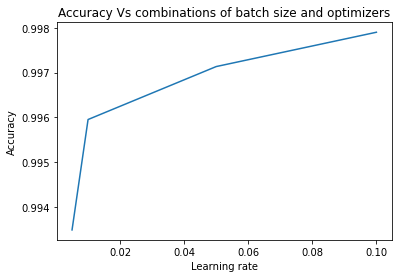

In [22]:
#4 different learning rate will be tested at first
learningRate=[0.005, 0.01, 0.05, 0.1]
acc=np.zeros(4)
for i in range(len(learningRate)):
  cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  cnn_model3.build(input_shape=(1,28,28,1))
  accuracy= cnn_model3.fit(X_train, y_train, batch_size=128, epochs=5)
  acc[i]=accuracy.history['accuracy'][4]
  cnn_model3.summary()

plt.plot(np.array(learningRate).reshape(4,1), np.array(acc).reshape(4,1))
plt.ylabel('Accuracy')
plt.xlabel('Learning rate')
plt.title('Accuracy Vs combinations of batch size and optimizers')
plt.show()

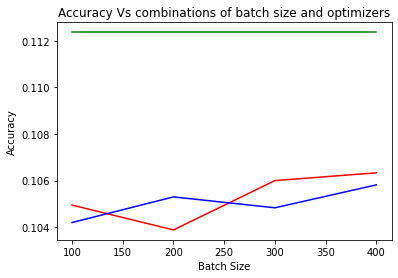

In [23]:
#Now, with 0.1 learning rate, I will try different combinations of batch size and optimizers
batch=[100, 200, 300, 400]
acc1=np.zeros(4)
acc2=np.zeros(4)
acc3=np.zeros(4)
for k in range(3):
  for i in range(len(batch)):    

        if k==0:
          opt_lr = tf.keras.optimizers.Adam(learning_rate=0.1)
          cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model3.build(input_shape=(1,28,28,1)) 
          #model.summary() 
          accuracy1= cnn_model3.fit(X_train, y_train,
              batch_size=batch[i], epochs=5, verbose=0) 
          acc1[i]=accuracy1.history['accuracy'][4]
        
        elif k==1:
          opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)
          cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model3.build(input_shape=(1,28,28,1)) 
          #model.summary() 
          accuracy2= cnn_model3.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)
          acc2[i]=accuracy2.history['accuracy'][4]

        
        elif k==2:
          opt_lr = tf.keras.optimizers.RMSprop(learning_rate=0.1)
          cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt_lr, metrics=['accuracy'])
          cnn_model3.build(input_shape=(1,28,28,1))  
          #model.summary() 
          accuracy3= cnn_model3.fit(X_train, y_train,
              batch_size=batch[i], epochs=5,
              verbose=0)   
          acc3[i]=accuracy3.history['accuracy'][4]

plt.plot(np.array(batch).reshape(4,1), np.array(acc1).reshape(4,1), color = 'red', label='Adam')
plt.plot(np.array(batch).reshape(4,1), np.array(acc2).reshape(4,1), color = 'green', label='SGD')
plt.plot(np.array(batch).reshape(4,1), np.array(acc3).reshape(4,1), color = 'blue', label='RMSProp')
plt.ylabel('Accuracy')
plt.xlabel('Batch Size')
plt.title('Accuracy Vs combinations of batch size and optimizers')
plt.show()

#It can be concluded that SGD worked best for model3. Batch size has almost no impact on accuracy when optimizer is SGD and learning rate=0.1.

In [24]:
#Final model 3
opt_lr = tf.keras.optimizers.SGD(learning_rate=0.1)

#Building model
cnn_model3 = tf.keras.models.Sequential()
#Here, number of filters has been increased from 50 to 100 and then decreased from 100 to 50
cnn_model3.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(100, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(90, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(80, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(70, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

cnn_model3.add(tf.keras.layers.Conv2D(60, kernel_size = (3,3), padding= 'same', activation='relu'))
cnn_model3.add(tf.keras.layers.Conv2D(50, kernel_size = (3,3), padding= 'same', activation='relu'))

cnn_model3.add(tf.keras.layers.Flatten())
cnn_model3.add(tf.keras.layers.Dense(10))                        #10 neurons to classify 10 different classes
cnn_model3.add(tf.keras.layers.Activation('softmax'))

cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model3.build(input_shape=(1,28,28,1))
cnn_model3.summary()

accuracy= cnn_model3.fit(X_train, y_train, batch_size=300, epochs=5)   #1 of Best batch sizes has been put   #epoch reduced to 5 to save RAM space

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_291 (Conv2D)         (1, 28, 28, 50)           500       
                                                                 
 conv2d_292 (Conv2D)         (1, 28, 28, 60)           27060     
                                                                 
 conv2d_293 (Conv2D)         (1, 28, 28, 70)           37870     
                                                                 
 max_pooling2d_87 (MaxPoolin  (1, 14, 14, 70)          0         
 g2D)                                                            
                                                                 
 conv2d_294 (Conv2D)         (1, 14, 14, 80)           50480     
                                                                 
 conv2d_295 (Conv2D)         (1, 14, 14, 90)           64890     
                                                     

In [25]:
# Evaluating the final model
score = cnn_model3.evaluate(X_test, y_test)
print('Test loss for model1:', score[0])
print('Test accuracy for model1:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0288 - accuracy: 0.9907
Test loss for model1: 0.028805701062083244
Test accuracy for model1: 0.9907000064849854


#Test accuracy is now 0.9907

#Finally, number of epochs might have played a role in choosing best model. Due to google Colab's RAM issue, I had to make these as sample instead of following all the best practices. For example smaller batch size might have come out as better option than the currently chosen batch sizes, but converging would take more time.